Abalone Dataset: 

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone and counting the number of rings through a microscope. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Predictor 

- Sex {Male, Female, Immature}
- Length real (mm) [0.075, 0.815]
- Diameter real (mm) [0.055, 0.65]
- Height real (mm) [0.0, 1.13]
- Whole_weight real (g) [0.0020, 2.8255]
- Shucked_weight real (g) [0.0010, 1.488]
- Viscera_weight real (g) [0.0005, 0.76]
- Shell_weight real (g) [0.0015, 1.005]

Response
- Rings integer [1,29]


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from ggplot import *
from sklearn import linear_model
from statsmodels.formula.api import ols

In [2]:
abalone= pd.read_csv('../data/abalone.csv')

In [3]:
abalone [:5]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3,0.400,0.305,0.100,0.3415,0.1760,0.0625,0.0865,7
1,2,0.635,0.500,0.150,1.3760,0.6495,0.3610,0.3100,10
2,3,0.370,0.270,0.090,0.1855,0.0700,0.0425,0.0650,7
3,1,0.680,0.540,0.155,1.5340,0.6710,0.3790,0.3840,10
4,3,0.375,0.285,0.090,0.2545,0.1190,0.0595,0.0675,6


#Exploratory Data Analysis

In [4]:
abalone.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null int64
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_weight      4177 non-null float64
Shucked_weight    4177 non-null float64
Viscera_weight    4177 non-null float64
Shell_weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(2)
memory usage: 326.3 KB


- There are 4,177 observations
- No missing values
- Total 8 features (predictors), with "Rings" as response
- "Sex" is nominal variable.  To continue the analysis, add variables as "isMale", "isFemale", "isImmature"

In [3]:
isMale = [0]*len(abalone)
isFemale = [0]*len(abalone)
isImmature = [0]*len(abalone)

# Loop through the sex integer
for i in range(len(abalone)):
    if abalone['Sex'][i]==1: 
        isMale[i] = 1
        
    elif abalone['Sex'][i]==2:
        isFemale[i] = 1

    else: isImmature[i] = 1
        
abalone['isMale'] = isMale
abalone['isFemale'] = isFemale
abalone['isImmature'] = isImmature

In [6]:
abalone[:5]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,isMale,isFemale,isImmature
0,3,0.400,0.305,0.100,0.3415,0.1760,0.0625,0.0865,7,0,0,1
1,2,0.635,0.500,0.150,1.3760,0.6495,0.3610,0.3100,10,0,1,0
2,3,0.370,0.270,0.090,0.1855,0.0700,0.0425,0.0650,7,0,0,1
3,1,0.680,0.540,0.155,1.5340,0.6710,0.3790,0.3840,10,1,0,0
4,3,0.375,0.285,0.090,0.2545,0.1190,0.0595,0.0675,6,0,0,1


Create scatterplot of predictors and response (Rings)

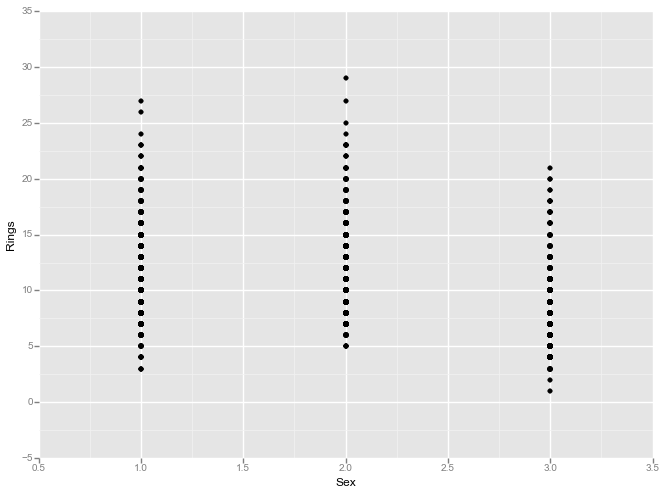

<ggplot: (3348232)>

In [7]:
# Scatterplot: Sex vs. Rings
ggplot(abalone, aes(x = abalone.columns[0], y = 'Rings')) + \
        geom_point()  

C:\Users\Emily\Anaconda\lib\site-packages\pandas\util\decorators.py:81: FutureWarning: the 'rows' keyword is deprecated, use 'index' instead
  warnings.warn(msg, FutureWarning)
C:\Users\Emily\Anaconda\lib\site-packages\ggplot\geoms\geom_bar.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  _reset = self.bottom == None or (self.ax != None and self.ax != ax)


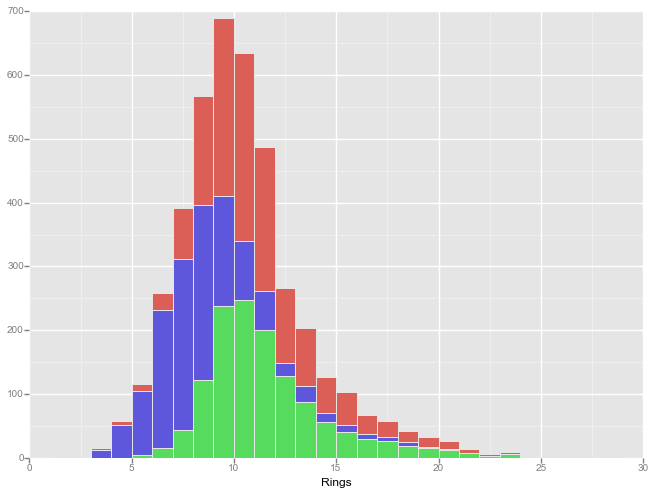

<ggplot: (28882110)>

In [9]:
# Let see the histogram of the Rings by Sex 
ggplot(abalone, aes(x='Rings', fill='Sex')) + geom_histogram(binwidth=1)

# Red = Male
# Green = Female
# Immature = Blue

In [10]:
print sum(abalone['isMale'])
print sum(abalone['isFemale'])
print sum(abalone['isImmature'])

1528
1307
1342


From the scatter plot, immature has a lower rings integer.  Female and male are similar.

From histogram, both male and females have more observation of 8 - 14.  Males have slight more observations than female in this range. May due to more samples size of male than female or naturally there are more male result in this range than female. 


With the wide range of ring, we want to group them into 3 categories (young, adult, old) as people should not bother the very exact ring. With above observations, we group young as <7, adult as 8 - 14, old as >15 

In [4]:
# Create age columns for the variable and initialize it as 0 in the first place
age=[0]*len(abalone)

# Loop through the ring integer
for i in range(len(abalone)):
    if abalone['Rings'][i]<7.5:  # young abalone 
        age[i] = 1
        
    elif abalone['Rings'][i]<14.5:  # adult abalone
         age[i] = 2

    else: age[i] = 3    # old abalone
        
abalone['age'] = age

In [9]:
abalone[:5]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,isMale,isFemale,isImmature,age
0,3,0.400,0.305,0.100,0.3415,0.1760,0.0625,0.0865,7,0,0,1,1
1,2,0.635,0.500,0.150,1.3760,0.6495,0.3610,0.3100,10,0,1,0,2
2,3,0.370,0.270,0.090,0.1855,0.0700,0.0425,0.0650,7,0,0,1,1
3,1,0.680,0.540,0.155,1.5340,0.6710,0.3790,0.3840,10,1,0,0,2
4,3,0.375,0.285,0.090,0.2545,0.1190,0.0595,0.0675,6,0,0,1,1


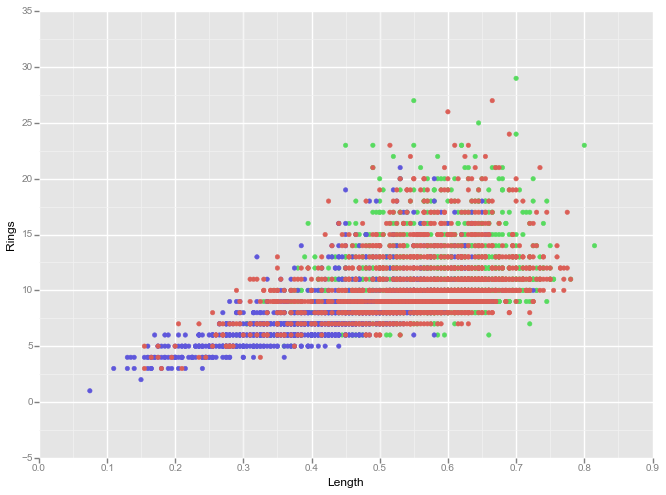

<ggplot: (29439218)>

In [7]:
# Scatterplot: Length vs. Rings
ggplot(abalone, aes(x = abalone.columns[1], y = 'Rings', colour = 'Sex')) + \
        geom_point()  

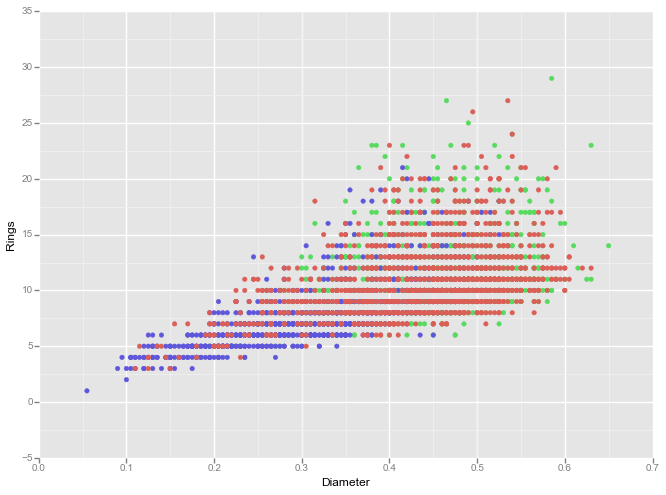

<ggplot: (25388923)>

In [8]:
# Scatterplot: Diameter vs. Rings
ggplot(abalone, aes(x = abalone.columns[2], y = 'Rings', colour = 'Sex')) + \
        geom_point()  

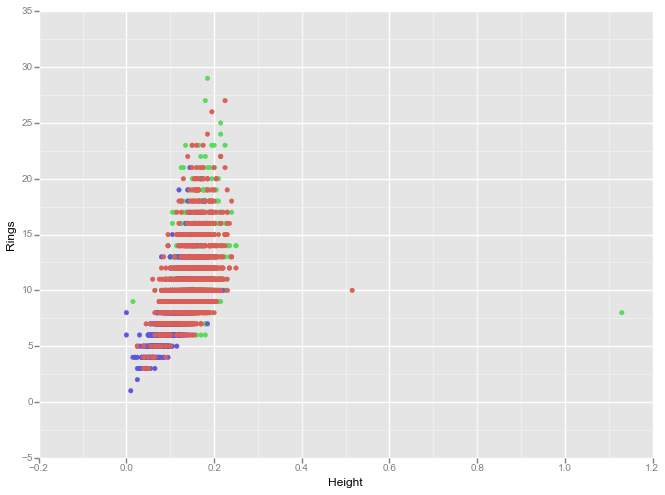

<ggplot: (29706609)>

In [9]:
# Scatterplot: Height Real vs. Rings integer
ggplot(abalone, aes(x = abalone.columns[3], y = 'Rings', colour = 'Sex')) + \
        geom_point()  

There seems to have outliner at the height. 
Remove the outlier from the dataset

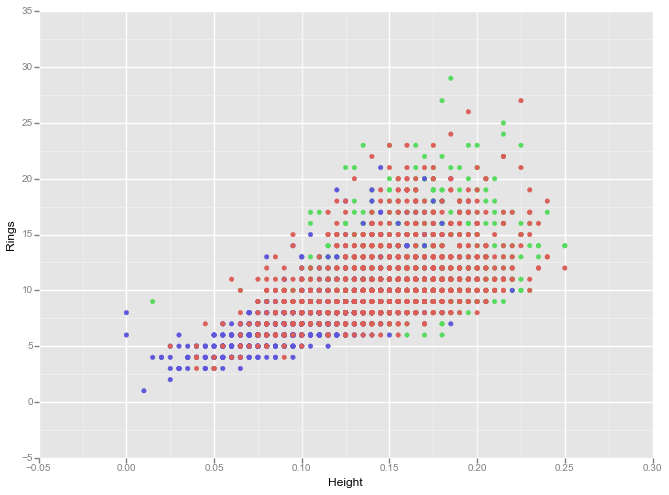

<ggplot: (32461432)>

In [11]:
#remove the outlier of height > 0.4
abalone = abalone[abalone['Height']<0.4]

# check whether it is successfully done. See max of Height is 0.25.
# Scatterplot: Height vs. Rings
ggplot(abalone, aes(x = abalone.columns[3], y = 'Rings', colour = 'Sex')) + \
        geom_point()  

Height, diameter and length have a similar pattern verus Rings integer. 
This align with out thoughts as when abalone grow, height, diameter and length will grow together

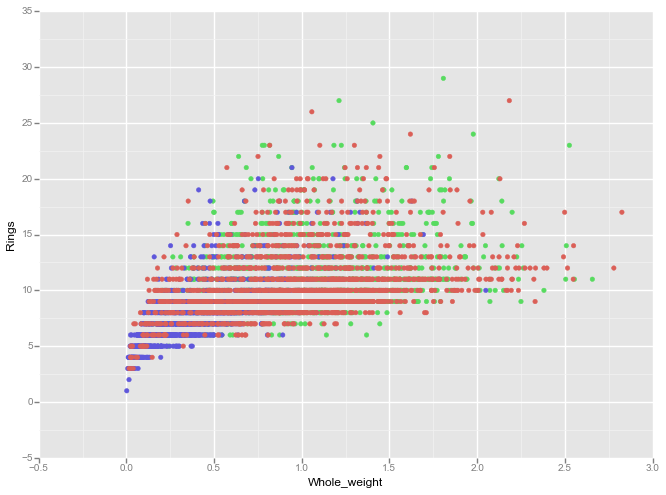

<ggplot: (32461530)>

In [12]:
# Scatterplot: Whole weight vs. Rings
ggplot(abalone, aes(x = abalone.columns[4], y = 'Rings', colour = 'Sex')) + \
        geom_point()  

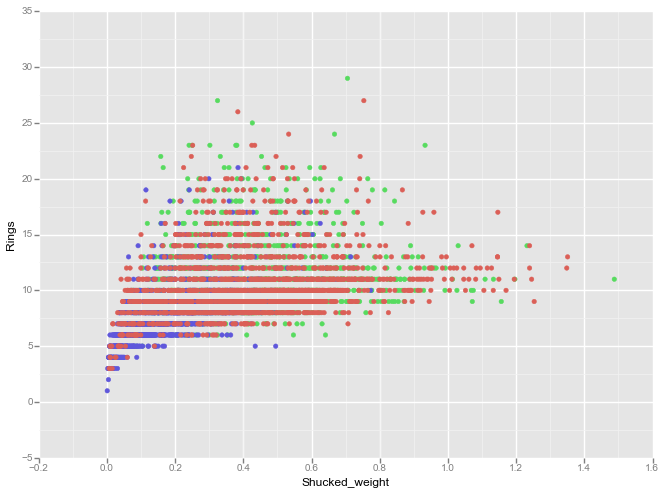

<ggplot: (29886878)>

In [13]:
# Scatterplot: Shucked Weight vs. Rings
ggplot(abalone, aes(x = abalone.columns[5], y = 'Rings', colour = 'Sex')) + \
        geom_point()  

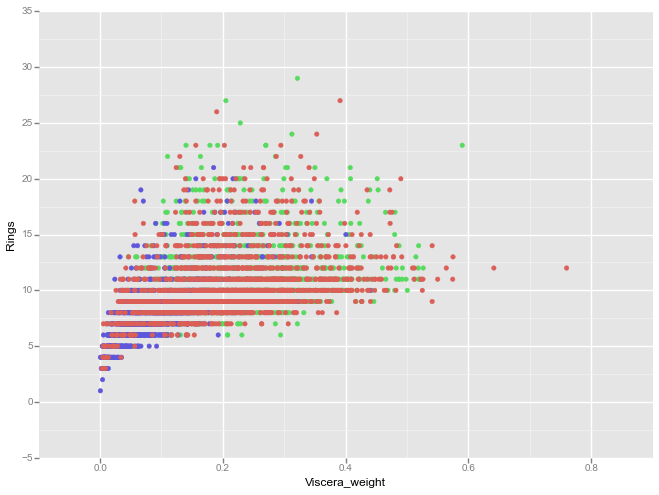

<ggplot: (29751304)>

In [15]:
# Scatterplot: Viscera Weight vs. Rings
ggplot(abalone, aes(x = abalone.columns[6], y = 'Rings', colour = 'Sex')) + \
        geom_point()  

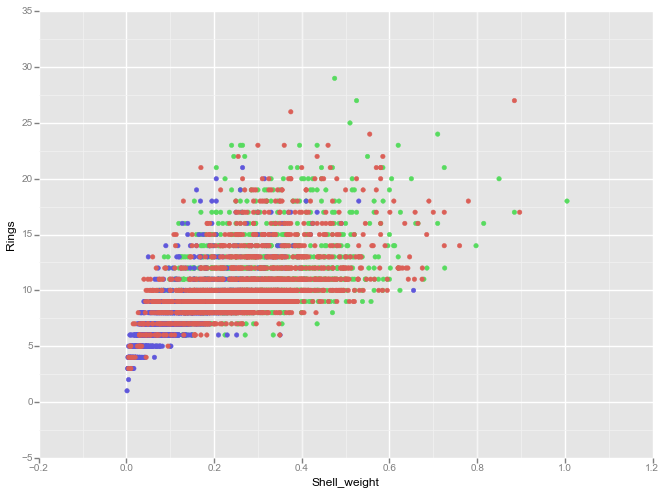

<ggplot: (29898563)>

In [17]:
# Scatterplot: Shell Weight vs. Rings
ggplot(abalone, aes(x = abalone.columns[7], y = 'Rings', colour = 'Sex')) + \
        geom_point()  

Findings from the graph with weight variables to ring integer
- The distribution with the weight variables to ring are very similar.  This is obviously true as shucked weight, viscera weight and shell weight should be a subset of whole weight. We may want to use only whole weight as predictor to avoid having high correlation between variables. 
- The variability of  all weight varaibles vs rings is higher when weight increase

In [14]:
# Look at the correlation of the data
abalone.corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,isMale,isFemale,isImmature,age
Sex,1.000000,-0.448553,-0.458027,-0.451985,-0.460978,-0.440665,-0.454394,-0.445304,-0.351880,-0.876721,0.036117,0.868295,-0.372339
Length,-0.448553,1.000000,0.986804,0.899834,0.925372,0.898184,0.903091,0.897648,0.556827,0.236103,0.310308,-0.551546,0.590279
Diameter,-0.458027,0.986804,1.000000,0.906086,0.925537,0.893385,0.899768,0.905271,0.574792,0.239926,0.319279,-0.564395,0.603141
Height,-0.451985,0.899834,0.906086,1.000000,0.887712,0.836400,0.865710,0.888980,0.609634,0.235869,0.316922,-0.557870,0.605540
Whole_weight,-0.460978,0.925372,0.925537,0.887712,1.000000,0.969386,0.966311,0.955385,0.540859,0.251378,0.300755,-0.557815,0.531669
Shucked_weight,-0.440665,0.898184,0.893385,0.836400,0.969386,1.000000,0.931868,0.882681,0.421442,0.251119,0.265025,-0.522078,0.445437
Viscera_weight,-0.454394,0.903091,0.899768,0.865710,0.966311,0.931868,1.000000,0.907603,0.504234,0.241509,0.309504,-0.556323,0.503948
Shell_weight,-0.445304,0.897648,0.905271,0.888980,0.955385,0.882681,0.907603,1.000000,0.627815,0.234824,0.307165,-0.547107,0.591559
Rings,-0.351880,0.556827,0.574792,0.609634,0.540859,0.421442,0.504234,0.627815,1.000000,0.181773,0.250585,-0.436227,0.832436
isMale,-0.876721,0.236103,0.239926,0.235869,0.251378,0.251119,0.241509,0.234824,0.181773,1.000000,-0.512350,-0.522653,0.202612


Correlation:
- Measurement variables (Length, diameter and height) are highly correlated to each other.  With the high correlation of the measurement variables, we want to "combine" to volume.  
- Weight variables (Whole weight, shucked weight, viscera weight and shell weight) are highly correlated to each other. As decide previously, we might want to just use Whole weight as our predictor to avoid the correlation between predictors. 
- Measurement variables and weight variables are also highly correlated. 
- The volume of the abalone and the weight may have high correlation. We will check soon. 
- Weak coorrelation found between male, female and ring integer, but moderate correlation with Immature.  We may want to split the dataset into three groups to do the prediction.


In [12]:
abalone['volume'] = abalone['Length']*abalone['Diameter']*abalone['Height']

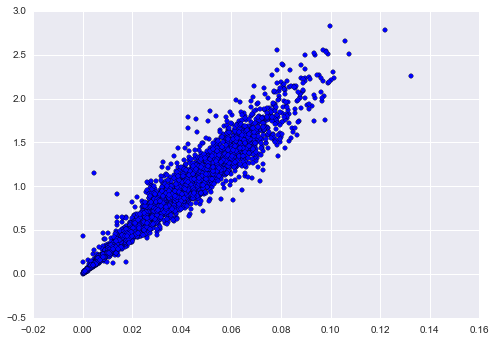

In [13]:
plt.scatter(abalone['volume'], abalone['Whole_weight'])

In [16]:
abalone.corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,isMale,isFemale,isImmature,age,whole_weight2,whole_weight3,volume
Sex,1.000000,-0.448553,-0.458027,-0.451985,-0.460978,-0.440665,-0.454394,-0.445304,-0.351880,-0.876721,0.036117,0.868295,-0.372339,-0.381476,-0.298509,-0.441099
Length,-0.448553,1.000000,0.986804,0.899834,0.925372,0.898184,0.903091,0.897648,0.556827,0.236103,0.310308,-0.551546,0.590279,0.789294,0.649970,0.929020
Diameter,-0.458027,0.986804,1.000000,0.906086,0.925537,0.893385,0.899768,0.905271,0.574792,0.239926,0.319279,-0.564395,0.603141,0.789343,0.649674,0.934314
Height,-0.451985,0.899834,0.906086,1.000000,0.887712,0.836400,0.865710,0.888980,0.609634,0.235869,0.316922,-0.557870,0.605540,0.772195,0.645268,0.934965
Whole_weight,-0.460978,0.925372,0.925537,0.887712,1.000000,0.969386,0.966311,0.955385,0.540859,0.251378,0.300755,-0.557815,0.531669,0.948880,0.845978,0.969470
Shucked_weight,-0.440665,0.898184,0.893385,0.836400,0.969386,1.000000,0.931868,0.882681,0.421442,0.251119,0.265025,-0.522078,0.445437,0.924491,0.828572,0.930701
Viscera_weight,-0.454394,0.903091,0.899768,0.865710,0.966311,0.931868,1.000000,0.907603,0.504234,0.241509,0.309504,-0.556323,0.503948,0.910280,0.804870,0.943235
Shell_weight,-0.445304,0.897648,0.905271,0.888980,0.955385,0.882681,0.907603,1.000000,0.627815,0.234824,0.307165,-0.547107,0.591559,0.894572,0.788441,0.949356
Rings,-0.351880,0.556827,0.574792,0.609634,0.540859,0.421442,0.504234,0.627815,1.000000,0.181773,0.250585,-0.436227,0.832436,0.450217,0.364968,0.553533
isMale,-0.876721,0.236103,0.239926,0.235869,0.251378,0.251119,0.241509,0.234824,0.181773,1.000000,-0.512350,-0.522653,0.202612,0.211438,0.169506,0.230886


Volume and weight are highly correlated. Variability increase when abalone is heavier.  We do not want to put the two variables in the model together due to multicollinearity.

In the feature selection, we want to use the volume or whole weight to predict the ring of the abalone and get the age group.

Also, split the data from different sex for analysis to see the impact.

#Motivation for feature selection

In [97]:
# Split dataset with different gender 
male_abalone = abalone[abalone['isMale']==1]  #Dataset with Male
female_abalone = abalone[abalone['isFemale']==1] #Dataset with Female
immature_abalone = abalone[abalone['isImmature']==1] #Dataset with Immature

In [16]:
male_abalone.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,isMale,isFemale,isImmature,age,volume,whole_weight2,whole_weight3,volume2,volume3
count,1527,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527,1527,1527,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1.527000e+03
mean,1,0.561297,0.439204,0.151143,0.990661,0.432504,0.215367,0.281819,10.705959,1,0,0,2.026195,0.040983,1.201884,1.669087,0.002073,1.198290e-04
std,0,0.102665,0.084364,0.033548,0.469700,0.222403,0.104724,0.130744,3.027287,0,0,0,0.438148,0.019829,1.070255,2.320240,0.001842,1.613919e-04
min,1,0.155000,0.110000,0.025000,0.015500,0.006500,0.003000,0.005000,3.000000,1,0,0,1.000000,0.000446,0.000240,0.000004,0.000000,8.849294e-11
25%,1,0.505000,0.395000,0.130000,0.670750,0.276250,0.145750,0.190000,9.000000,1,0,0,2.000000,0.026742,0.449909,0.301780,0.000715,1.912414e-05
50%,1,0.580000,0.455000,0.155000,0.975500,0.421500,0.210000,0.276000,10.000000,1,0,0,2.000000,0.040365,0.951600,0.928286,0.001629,6.576804e-05
75%,1,0.630000,0.497500,0.175000,1.265250,0.565500,0.277750,0.355250,12.000000,1,0,0,2.000000,0.053966,1.600858,2.025485,0.002912,1.571629e-04
max,1,0.780000,0.630000,0.250000,2.825500,1.351000,0.760000,0.897000,27.000000,1,0,0,3.000000,0.122063,7.983450,22.557239,0.014899,1.818640e-03


In [20]:
female_abalone.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,isMale,isFemale,isImmature,age,volume
count,1306,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306,1306,1306,1306.000000,1306.000000
mean,2,0.579188,0.454809,0.157266,1.046879,0.446275,0.230776,0.302139,11.131700,0,1,0,2.075804,0.044159
std,0,0.086124,0.070928,0.029588,0.430299,0.198714,0.097603,0.125610,3.104236,0,0,0,0.410117,0.018771
min,2,0.275000,0.195000,0.015000,0.080000,0.031000,0.021000,0.025000,5.000000,0,1,0,1.000000,0.003754
25%,2,0.525000,0.410000,0.140000,0.731500,0.295000,0.159000,0.214250,9.000000,0,1,0,2.000000,0.030201
50%,2,0.590000,0.465000,0.160000,1.038500,0.440500,0.224000,0.295000,10.000000,0,1,0,2.000000,0.043552
75%,2,0.640000,0.505000,0.175000,1.320375,0.573375,0.297375,0.375000,12.000000,0,1,0,2.000000,0.056650
max,2,0.815000,0.650000,0.250000,2.657000,1.488000,0.590000,1.005000,29.000000,0,1,0,3.000000,0.132437


In [21]:
immature_abalone.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,isMale,isFemale,isImmature,age,volume
count,1342,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342,1342,1342,1342.000000,1342.000000
mean,3,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462,0,0,1,1.542474,0.018156
std,0,0.108858,0.088109,0.031995,0.286275,0.128405,0.062536,0.084927,2.511554,0,0,0,0.546891,0.012615
min,3,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0,0,1,1.000000,0.000000
25%,3,0.360000,0.270000,0.085000,0.205500,0.090000,0.042500,0.064125,6.000000,0,0,1,1.000000,0.008400
50%,3,0.435000,0.335000,0.110000,0.384000,0.169750,0.080500,0.113000,8.000000,0,0,1,2.000000,0.015708
75%,3,0.510000,0.390000,0.130000,0.599375,0.270375,0.130000,0.178500,9.000000,0,0,1,2.000000,0.025967
max,3,0.725000,0.550000,0.220000,2.049500,0.773500,0.440500,0.655000,21.000000,0,0,1,3.000000,0.087725


The features of male and females are very similar from the describe()

# 1. Use whole_weight as the variables

In [36]:
X1_ab = ['Whole_weight']

y_ab = ['Rings']

# Male dataset

In [37]:
# Seperate test and train dataset
from random import sample
from sklearn.linear_model import Ridge

split = 0.7

# train index
train_idx = sample(male_abalone.index, int(split * len(male_abalone)))

# test index
test_idx  = male_abalone.index.difference(train_idx)


In [38]:
# X1: Fit only whole weight to the model
X1m_ab_train = male_abalone.ix[train_idx, X1_ab]
X1m_ab_test  = male_abalone.ix[test_idx, X1_ab]
ym_ab_train = male_abalone.ix[train_idx, y_ab]
ym_ab_test  = male_abalone.ix[test_idx, y_ab] 

In [39]:
m1_ab_linear = linear_model.LinearRegression()
m1_ab_linear.fit(X1m_ab_train, ym_ab_train)

print m1_ab_linear.score(X1m_ab_train, ym_ab_train)
m1_ab_coef = m1_ab_linear.coef_
m1_ab_int = m1_ab_linear.intercept_

print (m1_ab_coef)
print (m1_ab_int[0])           

0.119543835973
[[ 2.20463474]]
8.46866604556


In [41]:
# Calculate the yhat of male abalone
yhat_mab = [] #store the yhat of male abalone
y_mab = [] #store the y of male abalone

yhat_age = [] #store the age group of yhat
m_age = [] #store the age group of y

success = [] #success indicator of y and yhat

for i in set(ym_ab_test.index):
    # Calculate the yhat of male abalone
    yhat = m1_ab_int[0]+ m1_ab_coef[0][0]*X1m_ab_test['Whole_weight'][i]
    yhat_mab.append(yhat) #store in yhat list
    
    y_mab.append(ym_ab_test['Rings'][i]) #store y to y list
    
    yAge = 0
    # Get the age group of rings
    if ym_ab_test['Rings'][i]<7.5:  # young abalone 
        yAge = 1
    elif ym_ab_test['Rings'][i]<14.5:  # adult abalone
        yAge = 2
    else: yAge = 3
    m_age.append(yAge)
    
    yhatAge = 0
    # Get the age group of yhat rings
    if yhat<7.5:
        yhatAge = 1
    elif yhat<14.5:
        yhatAge = 2
    else: yhatAge = 3
    yhat_age.append(yhatAge)
    
    # Return 0 if age group of rings and yhat rings are the same
    if yAge == yhatAge:
        success.append(1)
    else: success.append(0)

m1_mResult = pd.DataFrame()
m1_mResult['y_ring'] = y_mab 
m1_mResult['yhat_ring'] = yhat_mab
m1_mResult['y_age'] = m_age
m1_mResult['yhat_age'] = yhat_age
m1_mResult['success'] = success

mab_success_rate = sum(success)/float(len(ym_ab_test))
print 'Successful rate for Male: {:>7.2%}'.format(mab_success_rate)



Successful rate for Male:  77.56%


# Female dataset

In [42]:
# Seperate test and train dataset
split = 0.7

# train index
train_idx = sample(female_abalone.index, int(split * len(female_abalone)))

# test index
test_idx  = female_abalone.index.difference(train_idx)


In [43]:
# X1: Fit only whole weight to the model
X1f_ab_train = female_abalone.ix[train_idx, X1_ab]
X1f_ab_test  = female_abalone.ix[test_idx, X1_ab]
yf_ab_train = female_abalone.ix[train_idx, y_ab]
yf_ab_test  = female_abalone.ix[test_idx, y_ab] 

In [44]:
f1_ab_linear = linear_model.LinearRegression()
f1_ab_linear.fit(X1f_ab_train, yf_ab_train)

print f1_ab_linear.score(X1f_ab_train, yf_ab_train)
f1_ab_coef = f1_ab_linear.coef_
f1_ab_int = f1_ab_linear.intercept_

print (f1_ab_coef[0])
print (f1_ab_int[0]) 

0.0560096022823
[ 1.68717756]
9.38245971402


In [45]:
# Calculate the yhat of female abalone
yhat_fab = [] #store the yhat of female abalone
y_fab = [] #store the y of female abalone

yhat_age = [] #store the age group of yhat
f_age = [] #store the age group of y

success = [] #success indicator of y and yhat

for i in set(yf_ab_test.index):
    # Calculate the yhat of female abalone
    yhat = f1_ab_int[0]+ f1_ab_coef[0][0]*X1f_ab_test['Whole_weight'][i]
    yhat_fab.append(yhat) #store in yhat list
    
    y_fab.append(yf_ab_test['Rings'][i]) #store y to y list
    
    yAge = 0
    # Get the age group of rings
    if yf_ab_test['Rings'][i]<7.5:  # young abalone 
        yAge = 1
    elif yf_ab_test['Rings'][i]<14.5:  # adult abalone
        yAge = 2
    else: yAge = 3
    f_age.append(yAge)
    
    yhatAge = 0
    # Get the age group of yhat rings
    if yhat<7.5:
        yhatAge = 1
    elif yhat<14.5:
        yhatAge = 2
    else: yhatAge = 3
    yhat_age.append(yhatAge)
    
    # Return 0 if age group of rings and yhat rings are the same
    if yAge == yhatAge:
        success.append(1)
    else: success.append(0)

m1_fResult = pd.DataFrame()
m1_fResult['y_ring'] = y_fab 
m1_fResult['yhat_ring'] = yhat_fab
m1_fResult['y_age'] = f_age
m1_fResult['yhat_age'] = yhat_age
m1_fResult['success'] = success

fab_success_rate = sum(success)/float(len(yf_ab_test))
print 'Successful rate for female: {:>7.2%}'.format(fab_success_rate)


Successful rate for female:  82.40%


# Immature dataset

In [133]:
# Seperate test and train dataset
split = 0.7

# train index
train_idx = sample(immature_abalone.index, int(split * len(immature_abalone)))

# test index
test_idx  = immature_abalone.index.difference(train_idx)

In [135]:
# X1: Fit only whole weight to the model
X1i_ab_train = immature_abalone.ix[train_idx, X1_ab]
X1i_ab_test  = immature_abalone.ix[test_idx, X1_ab]
yi_ab_train = immature_abalone.ix[train_idx, y_ab]
yi_ab_test  = immature_abalone.ix[test_idx, y_ab] 

In [136]:
i1_ab_linear = linear_model.LinearRegression()
i1_ab_linear.fit(X1i_ab_train, yi_ab_train)

print i1_ab_linear.score(X1i_ab_train, yi_ab_train)
i1_ab_coef = i1_ab_linear.coef_
i1_ab_int = i1_ab_linear.intercept_

print (i1_ab_coef[0])
print (i1_ab_int[0]) 

0.481324465618
[ 6.13616944]
5.22649642187


In [137]:
# Calculate the yhat of immature abalone
yhat_iab = [] #store the yhat of immature abalone
y_iab = [] #store the y of immature abalone

yhat_age = [] #store the age group of yhat
i_age = [] #store the age group of y

success = [] #success indicator of y and yhat

for i in set(yi_ab_test.index):
    # Calculate the yhat of immature abalone
    yhat = i1_ab_int[0]+ i1_ab_coef[0][0]*X1i_ab_test['Whole_weight'][i]
    yhat_iab.append(yhat) #store in yhat list
    
    y_iab.append(yi_ab_test['Rings'][i]) #store y to y list
    
    yAge = 0
    # Get the age group of rings
    if yi_ab_test['Rings'][i]<7.5:  # young abalone 
        yAge = 1
    elif yi_ab_test['Rings'][i]<14.5:  # adult abalone
        yAge = 2
    else: yAge = 3
    i_age.append(yAge)
    
    yhatAge = 0
    # Get the age group of yhat rings
    if yhat<7.5:
        yhatAge = 1
    elif yhat<14.5:
        yhatAge = 2
    else: yhatAge = 3
    yhat_age.append(yhatAge)
    
    # Return 0 if age group of rings and yhat rings are the same
    if yAge == yhatAge:
        success.append(1)
    else: success.append(0)

m1_iResult = pd.DataFrame()
m1_iResult['y_ring'] = y_iab 
m1_iResult['yhat_ring'] = yhat_iab
m1_iResult['y_age'] = i_age
m1_iResult['yhat_age'] = yhat_age
m1_iResult['success'] = success

iab_success_rate = sum(success)/float(len(yi_ab_test))
print 'Successful rate for Immature: {:>7.2%}'.format(iab_success_rate)


Successful rate for Immature:  80.15%


In [138]:
successForAll =  sum(m1_mResult['success']) + sum(m1_fResult['success']) + sum(m1_iResult ['success'])
totalTest = float(len(ym_ab_test) + len(yf_ab_test) + len(yi_ab_test))
print 'Successful rate for combining 3 model results: {:>7.2%}'.format(successForAll / totalTest)


Successful rate for combining 3 model results:  79.90%


#Full dataset

In [51]:
# Seperate test and train dataset
split = 0.7

# train index
train_idx = sample(abalone.index, int(split * len(abalone)))

# test index
test_idx  = abalone.index.difference(train_idx)

In [52]:
# X1: Fit only whole weight to the model
X1_ab_train = abalone.ix[train_idx, X1_ab]
X1_ab_test  = abalone.ix[test_idx, X1_ab]
y_ab_train = abalone.ix[train_idx, y_ab]
y_ab_test  = abalone.ix[test_idx, y_ab] 

In [53]:
a1_ab_linear = linear_model.LinearRegression()
a1_ab_linear.fit(X1_ab_train, y_ab_train)

print a1_ab_linear.score(X1_ab_train, y_ab_train)
a1_ab_coef = a1_ab_linear.coef_
a1_ab_int = a1_ab_linear.intercept_

print (a1_ab_coef[0])
print (a1_ab_int[0]) 

0.286618920375
[ 3.49513917]
7.01565367496


In [55]:
# Calculate the yhat of immature abalone
yhat_ab = [] #store the yhat of immature abalone
y_ab = [] #store the y of immature abalone

yhat_age = [] #store the age group of yhat
a_age = [] #store the age group of y

success = [] #success indicator of y and yhat

for i in set(y_ab_test.index):
    # Calculate the yhat of immature abalone
    yhat = a1_ab_int[0]+ a1_ab_coef[0][0]*X1_ab_test['Whole_weight'][i]
    yhat_ab.append(yhat) #store in yhat list
    
    y_ab.append(y_ab_test['Rings'][i]) #store y to y list
    
    yAge = 0
    # Get the age group of rings
    if y_ab_test['Rings'][i]<7.5:  # young abalone 
        yAge = 1
    elif y_ab_test['Rings'][i]<14.5:  # adult abalone
        yAge = 2
    else: yAge = 3
    a_age.append(yAge)
    
    yhatAge = 0
    # Get the age group of yhat rings
    if yhat<7.5:
        yhatAge = 1
    elif yhat<14.5:
        yhatAge = 2
    else: yhatAge = 3
    yhat_age.append(yhatAge)
    
    # Return 0 if age group of rings and yhat rings are the same
    if yAge == yhatAge:
        success.append(1)
    else: success.append(0)

m1_Result = pd.DataFrame()
m1_Result['y_ring'] = y_ab 
m1_Result['yhat_ring'] = yhat_ab
m1_Result['y_age'] = a_age
m1_Result['yhat_age'] = yhat_age
m1_Result['success'] = success

ab_success_rate = sum(success)/float(len(y_ab_test))
print 'Successful rate for All gender: {:>7.2%}'.format(ab_success_rate)


Successful rate for All gender:  75.90%


Look like the successful rate for the model without splitting the gender is very good.
- Successful rate for combining 3 model results:  78.95%
- Successful rate for All gender:  75.90%

We use the full dataset as a comparison on using "weight" or "volume"

#2. Use volume as the variables

In [59]:
X2_ab = ['volume']
y_ab = ['Rings']

In [64]:
# use the same test and train dataset as the whole weight model

In [60]:
# X2: Fit only volume to the model
X2_ab_train = abalone.ix[train_idx, X2_ab]
X2_ab_test  = abalone.ix[test_idx, X2_ab]
y_ab_train = abalone.ix[train_idx, y_ab]
y_ab_test  = abalone.ix[test_idx, y_ab] 

In [61]:
a2_ab_linear = linear_model.LinearRegression()
a2_ab_linear.fit(X2_ab_train, y_ab_train)

print a2_ab_linear.score(X2_ab_train, y_ab_train)
a2_ab_coef = a2_ab_linear.coef_
a2_ab_int = a2_ab_linear.intercept_

print (a2_ab_coef[0])
print (a2_ab_int[0]) 

0.301253787275
[ 84.34186059]
6.9965565566


In [63]:
# Calculate the yhat of immature abalone
yhat_ab = [] #store the yhat of immature abalone
y_ab = [] #store the y of immature abalone

yhat_age = [] #store the age group of yhat
a_age = [] #store the age group of y

success = [] #success indicator of y and yhat

for i in set(y_ab_test.index):
    # Calculate the yhat of immature abalone
    yhat = a2_ab_int[0]+ a2_ab_coef[0][0]*X2_ab_test['volume'][i]
    yhat_ab.append(yhat) #store in yhat list
    
    y_ab.append(y_ab_test['Rings'][i]) #store y to y list
    
    yAge = 0
    # Get the age group of rings
    if y_ab_test['Rings'][i]<7.5:  # young abalone 
        yAge = 1
    elif y_ab_test['Rings'][i]<14.5:  # adult abalone
        yAge = 2
    else: yAge = 3
    a_age.append(yAge)
    
    yhatAge = 0
    # Get the age group of yhat rings
    if yhat<7.5:
        yhatAge = 1
    elif yhat<14.5:
        yhatAge = 2
    else: yhatAge = 3
    yhat_age.append(yhatAge)
    
    # Return 0 if age group of rings and yhat rings are the same
    if yAge == yhatAge:
        success.append(1)
    else: success.append(0)

m2_Result = pd.DataFrame()
m2_Result['y_ring'] = y_ab 
m2_Result['yhat_ring'] = yhat_ab
m2_Result['y_age'] = a_age
m2_Result['yhat_age'] = yhat_age
m2_Result['success'] = success

ab_success_rate = sum(success)/float(len(y_ab_test))
print 'Successful rate for All gender: {:>7.2%}'.format(ab_success_rate)


Successful rate for All gender:  76.94%


The successful rate of model using volume is very close to the model using weight.

As weight is a direct variable, where volume is calculated from length, diameter and height.  We would prefer to use weight as the independent variable to predict rings. 

#Check whether the linear regression condition hold for our weight model

Let's see the residual plot of the model

In [84]:
# Calculate the yhat of immature abalone
yhat_ab = [] #store the yhat of immature abalone
y_ab = [] #store the y of immature abalone

for i in set(y_ab_train.index):
    # Calculate the yhat of immature abalone
    yhat = a1_ab_int[0]+ a1_ab_coef[0][0]*X1_ab_train['Whole_weight'][i]
    yhat_ab.append(yhat) #store in yhat list
    
    y_ab.append(y_ab_train['Rings'][i]) #store y to y list
    
m1_train = pd.DataFrame()
m1_train['y_ring'] = y_ab
m1_train['yhat_ring'] = yhat_ab
m1_train['residual'] = m1_train['y_ring'] - m1_train['yhat_ring']


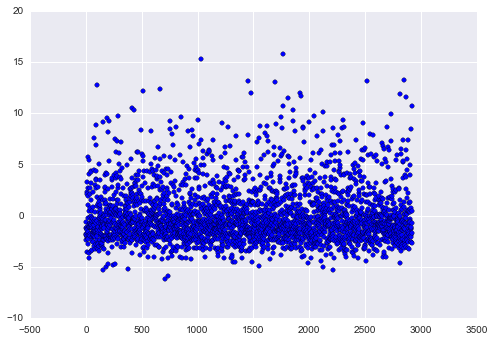

In [86]:
plt.scatter (m1_train.index, m1_train['residual'])

The residuals scatter around 0.  There are several with higher residual, which is the variability of the weight when the abalone is older.  

This shows that the linear regression condition holds.

In [66]:
m1_Result ['residual'] = m1_Result['y_ring'] - m1_Result['yhat_ring']


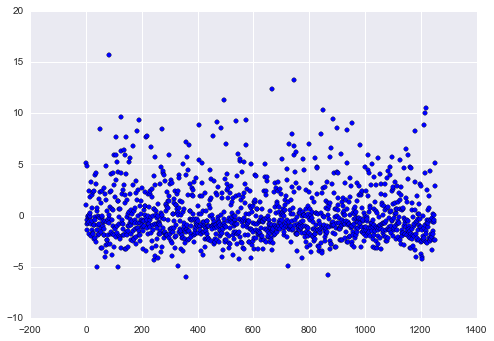

In [74]:
plt.scatter (m1_Result.index, m1_Result['residual'])


Very similar result 

# Findings

We decide to use whole weight as the independent variable to predict rings (Ring estimation = 7 + 3.5 x weight). Then classifed the predicted rings to the age group (0-7 ring as young, 8-14 as adult, 15 or above as old)

It is not possible to estimate the exact ring from the above variable.  The R^2 is incredibly bad!! (0.287 in my train dataset)

From the model, it shows an accurancy over 70% for using the whole dataset (not splitting sex). (77% in my train dataset)

Although, it shows a pretty good result using the whole dataset, we may want to keep immature as one dataset. This is because from the model, Ring estimation = 7 + 3.5 x weight, which is very unfavourable to immature, as we classify young as <7 and immature has the most young group. We can see that from the lower successful rate in the full dataset model. 

Female and male seem to be very similar. We want to simply the model by further group male and female and keep immature as one dataset.  

In [109]:
# Combine the male and female dataframe
mf_abalone = male_abalone.append(female_abalone)

In [110]:
mf_abalone.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,isMale,isFemale,isImmature,age,volume,whole_weight2,whole_weight3,volume2,volume3
count,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2.833000e+03
mean,1.460995,0.569545,0.446398,0.153966,1.016577,0.438853,0.222471,0.291186,10.902224,0.539005,0.460995,0,2.049065,0.042447,1.238342,1.709888,0.002178,1.269027e-04
std,0.498564,0.095797,0.078828,0.031924,0.452753,0.211887,0.101776,0.128780,3.069804,0.498564,0.498564,0,0.426099,0.019410,1.040047,2.222713,0.001850,1.641840e-04
min,1.000000,0.155000,0.110000,0.015000,0.015500,0.006500,0.003000,0.005000,3.000000,0.000000,0.000000,0,1.000000,0.000446,0.000240,0.000004,0.000000,8.849294e-11
25%,1.000000,0.515000,0.400000,0.135000,0.702000,0.286500,0.152000,0.203000,9.000000,0.000000,0.000000,0,2.000000,0.028119,0.492804,0.345948,0.000791,2.223308e-05
50%,1.000000,0.585000,0.460000,0.155000,1.003000,0.431500,0.217000,0.285000,10.000000,1.000000,0.000000,0,2.000000,0.041804,1.006009,1.009027,0.001748,7.305298e-05
75%,2.000000,0.635000,0.500000,0.175000,1.289500,0.568500,0.287500,0.365000,12.000000,1.000000,1.000000,0,2.000000,0.054945,1.662810,2.144194,0.003019,1.658764e-04
max,2.000000,0.815000,0.650000,0.250000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,0,3.000000,0.132437,7.983450,22.557239,0.017540,2.322913e-03


In [111]:
X1_ab = ['Whole_weight']

y_ab = ['Rings']

In [112]:
# Seperate test and train dataset
split = 0.7

# train index
train_idx = sample(mf_abalone.index, int(split * len(mf_abalone)))

# test index
test_idx  = mf_abalone.index.difference(train_idx)

In [113]:
# X1: Fit only whole weight to the model
X1mf_ab_train = abalone.ix[train_idx, X1_ab]
X1mf_ab_test  = abalone.ix[test_idx, X1_ab]
ymf_ab_train = abalone.ix[train_idx, y_ab]
ymf_ab_test  = abalone.ix[test_idx, y_ab] 

In [116]:
mf1_ab_linear = linear_model.LinearRegression()
mf1_ab_linear.fit(X1mf_ab_train, ymf_ab_train)

print mf1_ab_linear.score(X1mf_ab_train, ymf_ab_train)
mf1_ab_coef = mf1_ab_linear.coef_
mf1_ab_int = mf1_ab_linear.intercept_

print (mf1_ab_coef[0])
print (mf1_ab_int[0]) 

0.103592376375
[ 2.13593387]
8.67872828356


In [130]:
# Calculate the yhat of male and female abalone
yhat_mfab = [] #store the yhat of male and female abalone
y_mfab = [] #store the y of male and female abalone

yhat_age = [] #store the age group of yhat
mf_age = [] #store the age group of y

success = [] #success indicator of y and yhat

for i in set(ymf_ab_test.index):
    # Calculate the yhat of immature abalone
    yhat = mf1_ab_int[0]+ mf1_ab_coef[0][0]*X1mf_ab_test['Whole_weight'][i]
    yhat_mfab.append(yhat) #store in yhat list
    
    y_mfab.append(ymf_ab_test['Rings'][i]) #store y to y list
    
    yAge = 0
    # Get the age group of rings
    if ymf_ab_test['Rings'][i]<7.5:  # young abalone 
        yAge = 1
    elif ymf_ab_test['Rings'][i]<14.5:  # adult abalone
        yAge = 2
    else: yAge = 3
    mf_age.append(yAge)
    
    yhatAge = 0
    # Get the age group of yhat rings
    if yhat<7.5:
        yhatAge = 1
    elif yhat<14.5:
        yhatAge = 2
    else: yhatAge = 3
    yhat_age.append(yhatAge)
    
    # Return 0 if age group of rings and yhat rings are the same
    if yAge == yhatAge:
        success.append(1)
    else: success.append(0)

m1_mfResult = pd.DataFrame()
m1_mfResult['y_ring'] = y_mfab 
m1_mfResult['yhat_ring'] = yhat_mfab
m1_mfResult['y_age'] = mf_age
m1_mfResult['yhat_age'] = yhat_age
m1_mfResult['success'] = success

mfab_success_rate = sum(success)/float(len(ymf_ab_test))

Successful rate for Male and Female:  79.29%


In [131]:
print 'Successful rate for Male and Female: {:>7.2%}'.format(mfab_success_rate)
print 'Successful rate for Male: {:>7.2%}'.format(mab_success_rate)
print 'Successful rate for Female: {:>7.2%}'.format(fab_success_rate)

Successful rate for Male and Female:  79.29%
Successful rate for Male:  77.56%
Successful rate for Female:  82.40%


The successful rate for male and female combined is not bad :).   We can combine them for simplicity. 

In [141]:
print "Male Model"
print "Coef: " + str(m1_ab_coef[0][0])
print "Intercept: " + str(m1_ab_int[0])
print "Successful rate: {:>7.2%}".format(mab_success_rate)
print
print "Female Model"
print "Coef: " + str(f1_ab_coef[0][0])
print "Intercept: " + str(f1_ab_int[0])
print "Successful rate: {:>7.2%}".format(fab_success_rate)
print
print "Male + Female Model"
print "Coef: " + str(mf1_ab_coef[0][0])
print "Intercept: " + str(mf1_ab_int[0])
print "Successful rate: {:>7.2%}".format(mfab_success_rate)
print
print "Immature Model"
print "Coef: " + str(i1_ab_coef[0][0])
print "Intercept: " + str(i1_ab_int[0])
print "Successful rate: {:>7.2%}".format(iab_success_rate)
print
print "Full Model"
print "Coef: " + str(a1_ab_coef[0][0])
print "Intercept: " + str(a1_ab_int[0])
print "Successful rate: {:>7.2%}".format(ab_success_rate)


Male Model
Coef: 2.2046347393
Intercept: 8.46866604556
Successful rate:  77.56%

Female Model
Coef: 1.68717755817
Intercept: 9.38245971402
Successful rate:  82.40%

Male + Female Model
Coef: 2.13593386997
Intercept: 8.67872828356
Successful rate:  79.29%

Immature Model
Coef: 6.13616944153
Intercept: 5.22649642187
Successful rate:  80.15%

Full Model
Coef: 3.49513917331
Intercept: 7.01565367496
Successful rate:  76.94%


Conclusion:
- Age group is classified by ring estimation, defined young as 0-7, adult as 8-14, old as 15 or above
- As general, the ring of abalone can be estimated as 7 + 3.5 x weight. Then classify to the above age group.
- However, for better result on the immature abalone, it is preferred to estimated as 5.2 + 6.1 x weight.
- For male and female abalone,  the ring is estiamted as 8.6 + 2.1 x weight

We see that immature is more dependent with weight, i.e. a higher coefficient in immature model than coefficient in male and female model